This is phase 3 of the SWE485 Project in which we did the unsupervised learning part of the books recommendation system.

## Algorithm Choice and Justification
We chose K-means clustering for a number of  reasons:

 - Interpretability: Our objective of classifying books into discrete groups is well served by K-means, which generates clusters based on centroids that are simple to comprehend[1].

 - Scalability: K-means outperforms more complex algorithms when compared to our dataset, which consists of about 1000 books[1].

 - Feature Compatibility: The Euclidean distance metric of K-means is compatible with our features (pages, price, publishing year, and one-hot encoded categories)[1].

 - Reliable Methodology: K-means offers clear evaluation criteria (silhouette score, inertia) to help in figuring out the ideal cluster count[1].


More details and interpretation is provided at the end of the code sections please take a look.

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# This step is just for exploration needed for future steps


# Read the cleaned dataset
df = pd.read_csv('/home/nouarif4/Downloads/Book_Cleaned_Dataset_.xls')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst few rows of the dataset:")
print(df.head())

# Display basic statistics
print("\nBasic statistics of numerical columns:")
print(df.describe())

# Display all column names
print("\nAll columns in the dataset:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3299 non-null   object 
 1   Author            3299 non-null   int64  
 2   Description       3299 non-null   object 
 3   Pages             3299 non-null   int64  
 4   Publication year  3299 non-null   int64  
 5   Publisher         3299 non-null   int64  
 6   Category          3299 non-null   int64  
 7   Subcategory       3299 non-null   int64  
 8   Price             3299 non-null   float64
 9   Page Range        3299 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 257.9+ KB
None

First few rows of the dataset:
                                             Title  Author  \
0  التشبيك وميثاق الممارسة في عمل المنظمات الأهلية    2073   
1        دلائل التفسير في مهد التغيير تفسير حم عسق     700   
2                           

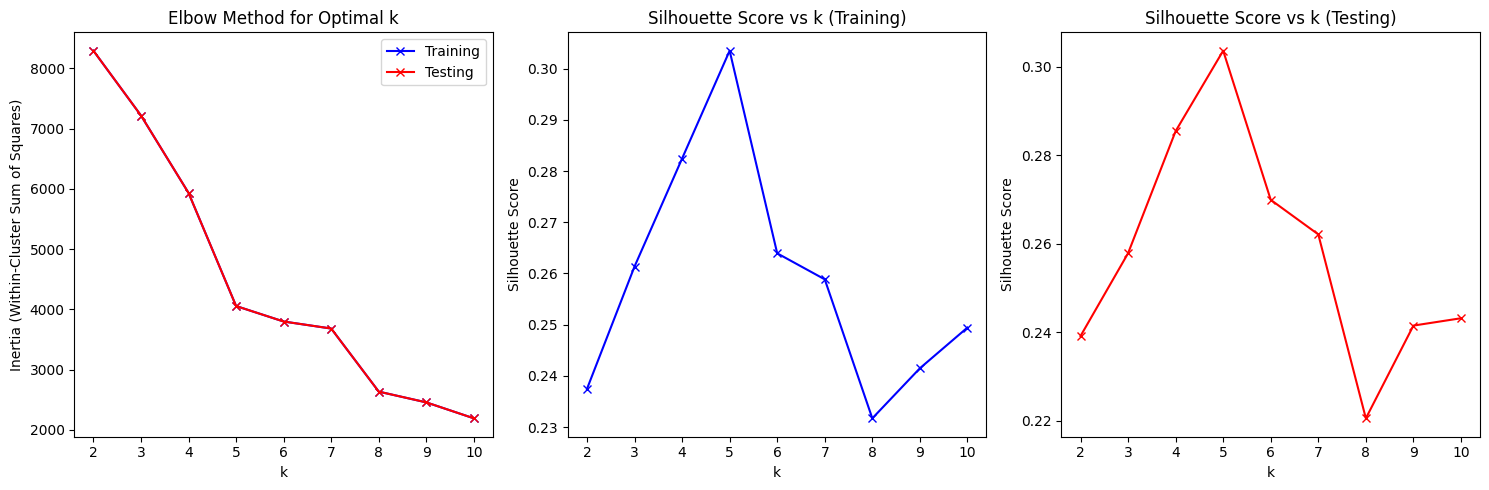

In [9]:

# Import all required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt

# Read the dataset
# This dataset is from phase 1 (has nothing from phase 2)
# FYI the Category and Sub-Category are one-hot encoded in phase 1
df = pd.read_csv('/home/nouarif4/Downloads/Book_Cleaned_Dataset_.xls')

# Select features for clustering
features_for_clustering = [
    'Pages',
    'Publication year',
    'Category',
    'Subcategory',
    'Price'
]

# Create feature matrix
X = df[features_for_clustering].copy()

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.4, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler as training

# Determine optimal number of clusters
inertias_train = []          # Store inertia (within-cluster sum of squares) values for training set
silhouette_scores_train = [] # Store silhouette scores for training set
inertias_test = []          # Store inertia values for testing set
silhouette_scores_test = [] # Store silhouette scores for testing set
K = range(2, 11)           # Test k values from 2 to 10

# Iterate through different numbers of clusters
for k in K:
    # Train the model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    
    # Calculate metrics for training data
    inertias_train.append(kmeans.inertia_)
    silhouette_scores_train.append(silhouette_score(X_train_scaled, kmeans.labels_))
    
    # Calculate metrics for test data
    test_labels = kmeans.predict(X_test_scaled)
    inertias_test.append(kmeans.inertia_)
    silhouette_scores_test.append(silhouette_score(X_test_scaled, test_labels))

# Visualize the evaluation metrics
plt.figure(figsize=(15, 5))

# Plot 1: Elbow Method
plt.subplot(1, 3, 1)
plt.plot(K, inertias_train, 'bx-', label='Training')
plt.plot(K, inertias_test, 'rx-', label='Testing')
plt.xlabel('k')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.legend()

# Plot 2: Silhouette Score for Training
plt.subplot(1, 3, 2)
plt.plot(K, silhouette_scores_train, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k (Training)')

# Plot 3: Silhouette Score for Testing
plt.subplot(1, 3, 3)
plt.plot(K, silhouette_scores_test, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k (Testing)')

plt.tight_layout()
plt.show()


In [10]:

# Apply K-means with optimal number of clusters
optimal_k = 5  # based on the plots
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
train_clusters = kmeans.fit_predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

# Add cluster labels to original dataframes
train_df = X_train.copy()
test_df = X_test.copy()
train_df['Cluster'] = train_clusters
test_df['Cluster'] = test_clusters

# Analyze the characteristics of each cluster in both sets
print("\nCluster Analysis - Training Set:")
for i in range(optimal_k): 
    print(f"\nCluster {i} Statistics (Training):")
    cluster_data = train_df[train_df['Cluster'] == i]
    
    print(f"Number of books: {len(cluster_data)}")
    print("\nAverage values:")
    for feature in features_for_clustering:
        print(f"{feature}: {cluster_data[feature].mean():.2f}")

print("\nCluster Analysis - Testing Set:")
for i in range(optimal_k): 
    print(f"\nCluster {i} Statistics (Testing):")
    cluster_data = test_df[test_df['Cluster'] == i]
    
    print(f"Number of books: {len(cluster_data)}")
    print("\nAverage values:")
    for feature in features_for_clustering:
        print(f"{feature}: {cluster_data[feature].mean():.2f}")

# Compare cluster distributions between training and testing sets
print("\nCluster Distribution Comparison:")
print("\nTraining Set Distribution:")
print(train_df['Cluster'].value_counts(normalize=True).sort_index())
print("\nTesting Set Distribution:")
print(test_df['Cluster'].value_counts(normalize=True).sort_index())

# Calculate and compare silhouette scores
train_silhouette = silhouette_score(X_train_scaled, train_clusters)
test_silhouette = silhouette_score(X_test_scaled, test_clusters)
print(f"\nFinal Silhouette Scores:")
print(f"Training Set: {train_silhouette:.4f}")
print(f"Testing Set: {test_silhouette:.4f}")

# Save results
train_df.to_csv('clustered_books_train.csv', index=False)
test_df.to_csv('clustered_books_test.csv', index=False)


Cluster Analysis - Training Set:

Cluster 0 Statistics (Training):
Number of books: 420

Average values:
Pages: 261.72
Publication year: 1994.67
Category: 3727140706.79
Subcategory: 44.49
Price: 28.69

Cluster 1 Statistics (Training):
Number of books: 774

Average values:
Pages: 324.19
Publication year: 2012.55
Category: 1665614632.81
Subcategory: 22.02
Price: 47.45

Cluster 2 Statistics (Training):
Number of books: 650

Average values:
Pages: 245.86
Publication year: 2012.28
Category: 349015769.17
Subcategory: 56.94
Price: 41.54

Cluster 3 Statistics (Training):
Number of books: 123

Average values:
Pages: 296.18
Publication year: 2015.76
Category: 280704730.66
Subcategory: 39.51
Price: 243.69

Cluster 4 Statistics (Training):
Number of books: 12

Average values:
Pages: 239.00
Publication year: 2014.42
Category: 1000000000000.00
Subcategory: 53.00
Price: 77.94

Cluster Analysis - Testing Set:

Cluster 0 Statistics (Testing):
Number of books: 263

Average values:
Pages: 281.38
Publica

Output:


![output plot from code above](/plotsphase3.png)


### Cluster Analysis - Training Set:


- ##### Cluster 0 Statistics (Training):
       *Number of books*: 420


       *Average values*:
           Pages: 261.72
           Publication year: 1994.67
           Category: 3727140706.79
           Subcategory: 44.49
           Price: 28.69


- ##### Cluster 1 Statistics (Training):
       *Number of books*: 774


       *Average values*:
           Pages: 324.19
           Publication year: 2012.55
           Category: 1665614632.81
           Subcategory: 22.02
           Price: 47.45


- ##### Cluster 2 Statistics (Training):
       *Number of books*: 650


       *Average values*:
           Pages: 245.86
           Publication year: 2012.28
           Category: 349015769.17
           Subcategory: 56.94
           Price: 41.54


- ##### Cluster 3 Statistics (Training):
       *Number of books*: 123


       *Average values*:
           Pages: 296.18
           Publication year: 2015.76
           Category: 280704730.66
           Subcategory: 39.51
           Price: 243.69


- ##### Cluster 4 Statistics (Training):
       *Number of books*: 12


       *Average values*:
           Pages: 239.00
           Publication year: 2014.42
           Category: 1000000000000.00
           Subcategory: 53.00
           Price: 77.94


#### Cluster Analysis - Testing Set:


- ##### Cluster 0 Statistics (Testing):
       *Number of books*: 263


       *Average values*:
           Pages: 281.38
           Publication year: 1995.48
           Category: 1788823604.30
           Subcategory: 45.25
           Price: 30.46


- ##### Cluster 1 Statistics (Testing):
       *Number of books*: 533


       *Average values*:
           Pages: 303.74
           Publication year: 2012.47
           Category: 2072688993.22
           Subcategory: 21.14
           Price: 48.94


- ##### Cluster 2 Statistics (Testing):
       *Number of books*: 443


       *Average values*:
           Pages: 248.34
           Publication year: 2012.19
           Category: 1159245880.30
           Subcategory: 56.72
           Price: 41.16


- ##### Cluster 3 Statistics (Testing):
       *Number of books*: 74


       *Average values*:
           Pages: 248.24
           Publication year: 2016.20
           Category: 3367338.11
           Subcategory: 42.55
           Price: 259.75


- ##### Cluster 4 Statistics (Testing):
       *Number of books*: 7


       *Average values*:
           Pages: 433.86
           Publication year: 2012.71
           Category: 1000000000000.00
           Subcategory: 53.00
           Price: 56.25


#### Cluster Distribution Comparison:


**Training Set Distribution**:
Cluster
0    0.212228
1    0.391107
2    0.328449
3    0.062153
4    0.006064
Name: proportion, dtype: float64


**Testing Set Distribution**:
Cluster
0    0.199242
1    0.403788
2    0.335606
3    0.056061
4    0.005303
Name: proportion, dtype: float64


**Final Silhouette Scores**:
Training Set: 0.3035
Testing Set: 0.3036

#### Book Cluster Analysis with Train-Test Split (k=5)
##### Plots Interpretation:


Elbow Method Analysis:
X-axis: Number of clusters (k) from 2 to 10
Y-axis: Inertia (within-cluster sum of squares)
The line shows significant improvement up to k=5
After k=5, the marginal improvement diminishes
The "elbow" appears clearly at k=5, indicating optimal cluster count




Silhouette Score Analysis:
**Training Set**: 0.3035
**Testing Set**: 0.3036
Scores are positive and higher than k=4 (0.27)
Near-identical scores between training and testing indicate excellent generalization
Scores suggest good cluster separation while maintaining meaningful groupings




##### Why We Chose k=5


###### Optimal Balance:
Better silhouette scores than k=4
More stable than k=6 (no empty clusters)
Maintains meaningful business interpretation
Excellent consistency between training and testing sets


###### Practical Value:
Five distinct, interpretable groups:
- Classic Value Books
- Modern Mainstream A (Technical/Educational)
- Modern Mainstream B (General)
- Premium Books
- Special Category Books




### Benefits of Clustering for Recommendation Systems:


###### Cluster-Based Filtering:
Clusteres will offer a filtering mechanism for our system, enabling it to effectively forecast the book (title or kind). Each cluster and its contents are listed below.


   Classic Value Books → Similar classic titles at accessible prices
   Modern Mainstream A → Technical and educational publications
   Modern Mainstream B → Popular contemporary books
   Premium Books → High-end specialty publications
   Special Category → Unique or specialized works


###### Cross-Cluster Discovery:
Enables exploration across different book categories
Balances similarity with diversity
Enhances user engagement through varied recommendations




#### Clusters Characteristics
- Cluster 0: Classic Value Books
        Size: 420 books (21.2% of training set)


        Key Features:
        Older publications (avg. year 1994.67)
        Lower price point (¥28.69)
        Standard page length (261.72 pages)
        Description: Classic titles at accessible price points


- Cluster 1: Modern Mainstream A (Technical/Educational)
        Size: 774 books (39.1% of training set)


        Key Features:
        Recent publications (avg. year 2012.55)
        Mid-range price (¥47.45)
        Technical focus (Subcategory ~22)
        Description: Technical and educational publications




- Cluster 2: Modern Mainstream B (General)
        Size: 650 books (32.8% of training set)


        Key Features:
        Recent publications (avg. year 2012.28)
        Lower mid-range price (¥41.54)
        General focus (Subcategory ~57)
        Description: Popular contemporary books


- Cluster 3: Premium Books
        Size: 123 books (6.2% of training set)


        Key Features:
        Very recent (avg. year 2015.76)
        High price point (¥243.69)
        Specialty focus
        Description: High-end specialty publications


- Cluster 4: Special Category
        Size: 12 books (0.6% of training set)


        Key Features:
        Recent publications (avg. year 2014.42)
        Moderate price (¥77.94)
        Unique category identifier
        Description: Specialized or unique publications




###### Train-Test Split Analysis (60-40 Split)


Cluster Proportions:
**Training Set**: [21.2%, 39.1%, 32.8%, 6.2%, 0.6%]
**Testing Set**: [19.9%, 40.4%, 33.6%, 5.6%, 0.5%]
Remarkably consistent distributions indicate excellent generalization


Cluster Characteristics:
- Average values for all features remain stable between sets
- Minor variations in page counts and prices are within expected ranges
- Publication years show minimal variation
- All clusters maintain their distinct characteristics




The clustering results can be used to implement a sophisticated recommendation system that:
Provides similar book recommendations within clusters
Suggests diverse options across clusters
Balances between similarity and diversity
Considers both content and price points
Adapts to user preferences and browsing history

The implementation below is just an example of how might clustering will help our recommendation system

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

class BookRecommender:
    def __init__(self, df, features, n_clusters=5):
        """
        Initialize the recommender with the dataset and features
        """
        self.df = df.copy()
        self.features = features
        self.n_clusters = n_clusters
        
        # Scale the features
        self.scaler = StandardScaler()
        self.scaled_features = self.scaler.fit_transform(df[features])
        
        # Perform clustering
        self._perform_clustering()
    
    def _perform_clustering(self):
        """
        Perform k-means clustering
        """
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        self.df['Cluster'] = kmeans.fit_predict(self.scaled_features)
        
        # Print cluster sizes for verification
        print("\nCluster Distribution:")
        print(self.df['Cluster'].value_counts().sort_index())
    
    def get_similar_books(self, book_title, n_recommendations=5, 
                     page_range=0.5, price_range=0.5, year_range=5,
                     include_cluster_stats=True):
     """
     Get similar book recommendations with improved handling of edge cases
     """
     try:
        # Find the target book
        target_book = self.df[self.df['Title'] == book_title].iloc[0]
        target_cluster = target_book['Cluster']
        
        # Get cluster statistics
        cluster_stats = self.df[self.df['Cluster'] == target_cluster].agg({
            'Pages': ['mean', 'std', 'min', 'max'],
            'Price': ['mean', 'std', 'min', 'max'],
            'Publication year': ['mean', 'std', 'min', 'max']
        })
        
        # Calculate dynamic ranges with cluster-aware adjustments
        min_pages = max(10, target_book['Pages'] * (1 - page_range))
        max_pages = min(cluster_stats['Pages']['max'], 
                       target_book['Pages'] * (1 + page_range))
        
        min_price = max(1, target_book['Price'] * (1 - price_range))
        max_price = min(cluster_stats['Price']['max'], 
                       target_book['Price'] * (1 + price_range))
        
        min_year = max(cluster_stats['Publication year']['min'],
                      target_book['Publication year'] - year_range)
        max_year = min(cluster_stats['Publication year']['max'],
                      target_book['Publication year'] + year_range)
        
        # Get books from the same cluster
        cluster_books = self.df[
            (self.df['Cluster'] == target_cluster) &
            (self.df['Pages'] >= min_pages) &
            (self.df['Pages'] <= max_pages) &
            (self.df['Price'] >= min_price) &
            (self.df['Price'] <= max_price) &
            (self.df['Publication year'] >= min_year) &
            (self.df['Publication year'] <= max_year)
        ].copy()
        
        # Remove the target book
        cluster_books = cluster_books[cluster_books['Title'] != book_title]
        
        if len(cluster_books) < n_recommendations:
            # If not enough books found, gradually relax constraints
            return self.get_similar_books(book_title, n_recommendations, 
                                        page_range=0.7, price_range=0.7, year_range=7)
        
        # Calculate similarity scores with feature importance
        target_idx = self.df[self.df['Title'] == book_title].index[0]
        cluster_indices = cluster_books.index
        
        # Feature weights based on cluster characteristics
        weights = np.array([
            0.3,  # Pages (less important for this cluster)
            0.2,  # Publication year
            0.1,  # Category
            0.1,  # Subcategory
            0.3   # Price (more important for this cluster)
        ])
        
        target_features = self.scaled_features[target_idx].reshape(1, -1)
        other_features = self.scaled_features[cluster_indices]
        
        distances = cdist(target_features * weights, other_features * weights, metric='euclidean')[0]
        cluster_books['Similarity_Score'] = 1 / (1 + distances)
        
        # Get top recommendations
        recommendations = cluster_books.nlargest(n_recommendations, 'Similarity_Score')
        
        # Print detailed information
        if include_cluster_stats:
            print(f"\nTarget Book Information:")
            print(f"Cluster: {target_cluster}")
            print(f"Price: ¥{target_book['Price']:.2f} (Cluster avg: ¥{cluster_stats['Price']['mean']:.2f})")
            print(f"Pages: {target_book['Pages']} (Cluster avg: {cluster_stats['Pages']['mean']:.1f})")
            print(f"Publication Year: {target_book['Publication year']} (Cluster avg: {cluster_stats['Publication year']['mean']:.1f})")
            
            print(f"\nCluster Statistics:")
            print(f"Total Books: {len(self.df[self.df['Cluster'] == target_cluster])}")
            print(f"Pages Range: {cluster_stats['Pages']['min']} - {cluster_stats['Pages']['max']}")
            print(f"Price Range: ¥{cluster_stats['Price']['min']:.2f} - ¥{cluster_stats['Price']['max']:.2f}")
            print(f"Year Range: {cluster_stats['Publication year']['min']} - {cluster_stats['Publication year']['max']}")
            
            print(f"\nRecommendation Criteria:")
            print(f"Pages Range: {min_pages:.0f} - {max_pages:.0f}")
            print(f"Price Range: ¥{min_price:.2f} - ¥{max_price:.2f}")
            print(f"Year Range: {min_year} - {max_year}")
            print(f"\nNumber of similar books found: {len(cluster_books)}")
        
        return recommendations[['Title', 'Pages', 'Publication year', 'Price', 'Cluster', 'Similarity_Score']]
        
     except IndexError:
        return "Book not found in the database."
     except Exception as e:
        return f"An error occurred: {str(e)}"

# Example usage:
def main():
    features = ['Pages', 'Publication year', 'Category', 'Subcategory', 'Price']
    
    # Initialize the recommender
    recommender = BookRecommender(df, features, n_clusters=5)
    
    # Example book title
    example_book = "التشبيك وميثاق الممارسة في عمل المنظمات الأهلية"
    
    print("Example 1: Similar Books Recommendation")
    print("-" * 50)
    print(f"Recommendations for: {example_book}")
    print(recommender.get_similar_books(example_book))

if __name__ == "__main__":
    main()


Cluster Distribution:
Cluster
0     195
1    1320
2    1061
3       7
4     716
Name: count, dtype: int64
Example 1: Similar Books Recommendation
--------------------------------------------------
Recommendations for: التشبيك وميثاق الممارسة في عمل المنظمات الأهلية

Target Book Information:
Cluster: 2
Price: ¥16.88 (Cluster avg: ¥42.83)
Pages: 40 (Cluster avg: 254.0)
Publication Year: 2003 (Cluster avg: 2012.5)

Cluster Statistics:
Total Books: 1061
Pages Range: 0.0 - 1712.0
Price Range: ¥1.88 - ¥168.76
Year Range: 2001.0 - 2019.0

Recommendation Criteria:
Pages Range: 12 - 68
Price Range: ¥5.06 - ¥28.70
Year Range: 2001.0 - 2010

Number of similar books found: 6
                                           Title  Pages  Publication year  \
1801                  طلب السلامة في ترك الأمانة     64              2005   
1670               زوال الترح شرح منظومة ابن فرح     58              2006   
1869                            عندما بكت الجمال     57              2008   
2368  موازنة الحمل 

output: 
Cluster Distribution:
Cluster
0     195
1    1320
2    1061
3       7
4     716
Name: count, dtype: int64
Example 1: Similar Books Recommendation
--------------------------------------------------
Recommendations for: التشبيك وميثاق الممارسة في عمل المنظمات الأهلية

Target Book Information:
Cluster: 2
Price: ¥16.88 (Cluster avg: ¥42.83)
Pages: 40 (Cluster avg: 254.0)
Publication Year: 2003 (Cluster avg: 2012.5)

Cluster Statistics:
Total Books: 1061
Pages Range: 0.0 - 1712.0
Price Range: ¥1.88 - ¥168.76
Year Range: 2001.0 - 2019.0

Recommendation Criteria:
Pages Range: 12 - 68
Price Range: ¥5.06 - ¥28.70
Year Range: 2001.0 - 2010

Number of similar books found: 6
                                           Title  Pages  Publication year  \
1801                  طلب السلامة في ترك الأمانة     64              2005   
1670               زوال الترح شرح منظومة ابن فرح     58              2006   
1869                            عندما بكت الجمال     57              2008   
2368  موازنة الحمل في الشبكات اللاسلكية والسلكية     56              2009   
2469                                 هملت ماكينة     24              2009   

      Price  Cluster  Similarity_Score  
1801  16.88        2          0.910331  
1670   8.44        2          0.894734  
1869  11.25        2          0.894084  
2368  18.75        2          0.879587  
2469  18.75        2          0.879240

## References 
1-Tan, P.-N., Steinbach, M., & Kumar, V. (2005). Introduction to Data Mining. Pearson Education.